In [1]:
#restaurant rating prediction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data= pd.read_csv(r'X:\Intern Task Files\res_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.columns 

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

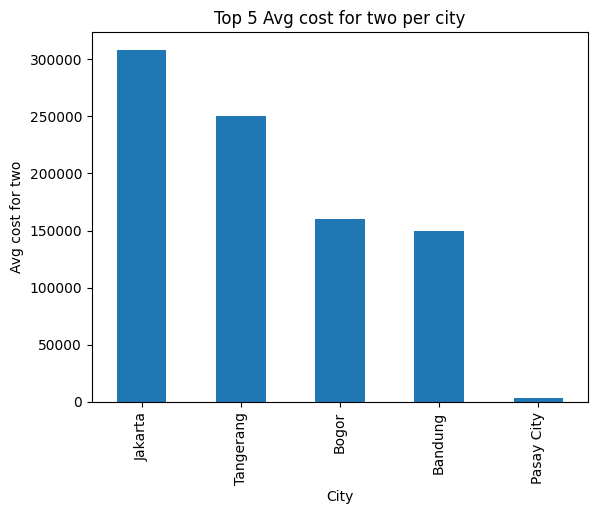

In [8]:
#Now we can start grouping 
data.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head(5).plot(kind="bar")
#Got an array of len 141
plt.title("Top 5 Avg cost for two per city")
plt.xlabel("City")
plt.ylabel("Avg cost for two")
plt.show()


In [9]:
#Cuisines and total number of votes
data.groupby("Cuisines")["Votes"].sum().reset_index()
#creating a new dataframe with this to remove unwante values
data0=data.groupby("Cuisines")["Votes"].sum().reset_index()


In [10]:
data0[data0["Votes"]!=0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


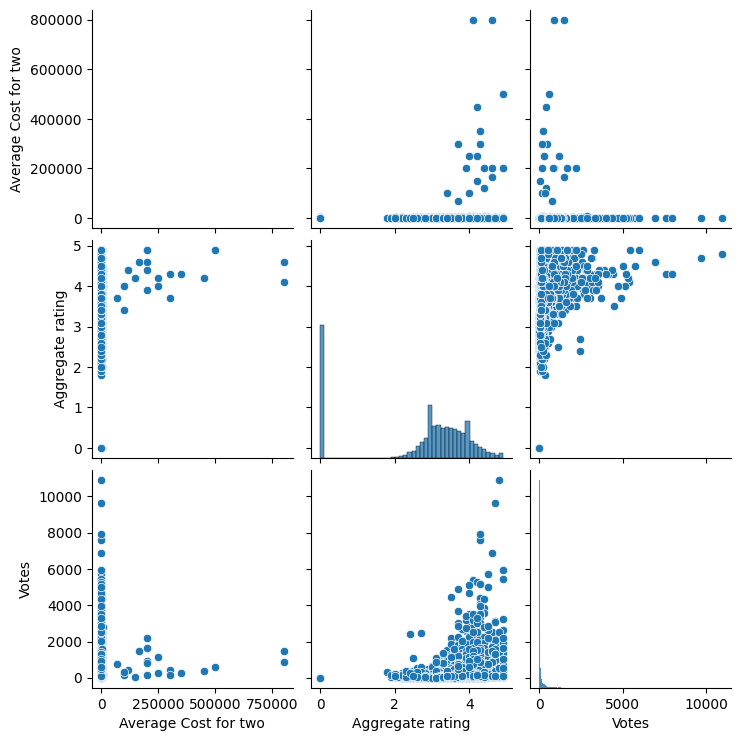

In [11]:
sns.pairplot(data[["Average Cost for two","Aggregate rating","Votes"]])

In [12]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Text(0, 0.5, '')

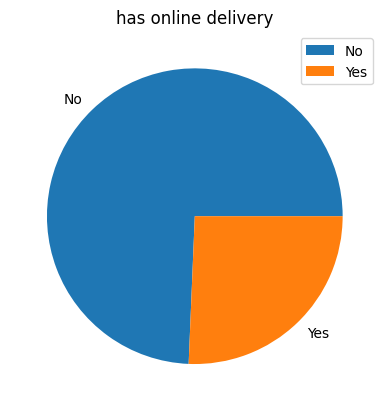

In [13]:
data["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("has online delivery")
plt.legend()
plt.ylabel("")


In [14]:
data[["Aggregate rating","Rating text"]].sort_values(by="Aggregate rating",ascending=True).head(2300)

,Aggregate rating,Rating text
2204,0.0,Not rated
78,0.0,Not rated
77,0.0,Not rated
69,0.0,Not rated
6953,0.0,Not rated
...,...,...
8755,2.4,Poor
6521,2.4,Poor
3567,2.4,Poor
3256,2.4,Poor


In [15]:
data=data[data["Rating text"]!="Not rated"]

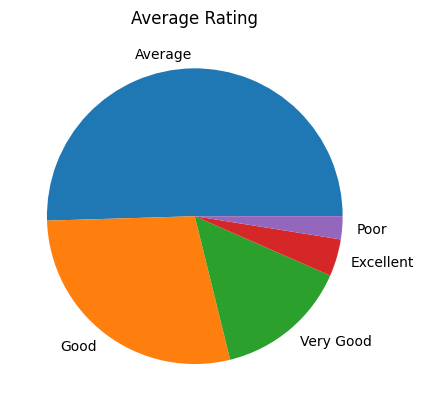

In [16]:
data["Rating text"].value_counts().plot(kind="pie")
plt.title("Average Rating")
plt.ylabel("")
plt.show()

In [17]:
#we can start modelling
#picking a few properties that actually affects the ratings
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [18]:
X=data[["Average Cost for two","Has Table booking","Has Online delivery","Price range"]]

In [20]:
Y=data[["Aggregate rating"]]

In [21]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [22]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()


In [23]:
X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])

C:\Users\AADI\AppData\Local\Temp\ipykernel_16408\3860357707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])


In [24]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [25]:
#Has table booking 0 is No and 1 is Yes
#Has Online delivery 0 is No and 1 is Yes 
X["Has Online delivery"] = labelencoder.fit_transform(X['Has Online delivery'])

C:\Users\AADI\AppData\Local\Temp\ipykernel_16408\3375678707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Online delivery"] = labelencoder.fit_transform(X['Has Online delivery'])


In [26]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [27]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [28]:
X = scaler.fit_transform(X)

In [29]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2) 

In [32]:
#Defining a function for the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
def modelresults(prediction):
    print("Mean absolute error on model is{}". format(mean_absolute_error(Y_test, prediction)))
    print("Root mean squared error on model is{}". format(np.sqrt(mean_squared_error(Y_test, prediction))))

In [34]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
#training the model
lr.fit(X_train, Y_train)
predictionfromlr = lr.predict(X_test)

In [35]:
modelresults(predictionfromlr)
#linear regression

Mean absolute error on model is0.4085897139637487
Root mean squared error on model is0.5182167769431321


In [36]:
predictionfromlr

array([[3.43741132],
       [3.48795382],
       [4.02633883],
       ...,
       [3.48756822],
       [3.21876132],
       [3.43728279]])

In [37]:
#SVM
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [38]:
svrmodel = SVR()
param_gridsvr = { "C": [0.5], "kernel": ["poly"], "degree":[2]}

In [39]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(X_train, Y_train)

x:\Intern Task Files\Restaurant\.venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
x:\Intern Task Files\Restaurant\.venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
x:\Intern Task Files\Restaurant\.venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
x:\Intern Task Files\Restaurant\.venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was e

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.5], 'degree': [2], 'kernel': ['poly']})

In [40]:
predictgridsvr = gridsvr.predict(X_test)

In [41]:
modelresults(predictgridsvr)

Mean absolute error on model is0.4222033929317385
Root mean squared error on model is0.5337991966824372


In [42]:
from sklearn.ensemble import RandomForestRegressor
#using random forest regresssor

In [43]:
randomfrmodel = RandomForestRegressor()
param_gridrandomfr = {"max_depth":[5,15], "n_estimators":[2,5,10]}
gridrandomfr = GridSearchCV(randomfrmodel, param_gridrandomfr)


In [44]:
gridrandomfr.fit(X_train,Y_train)

x:\Intern Task Files\Restaurant\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
x:\Intern Task Files\Restaurant\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
x:\Intern Task Files\Restaurant\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
x:\Intern Task Files\Restaurant\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [45]:
randomforestprediction = gridrandomfr.predict(X_test)
modelresults(randomforestprediction)

Mean absolute error on model is0.3648787067302401
Root mean squared error on model is0.469533356193406


In [46]:
gridrandomfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [47]:
import joblib
joblib.dump(gridrandomfr,"mlmodel.pkl")

['mlmodel.pkl']

In [48]:
#setting scaler
scaler

StandardScaler()

In [49]:
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']